# Stochastic Calculus: An Introduction with Applications
## Chapter 1: Martingales in Discrete Time

### C1: Simulating Polya's Urn
(a) Implement a function simulate polya(num steps) that:

- Starts with red = 1, green = 1.
- Repeats for n = 1,2,...,num steps: choose red or green with probability proportional to current counts, then increment the chosen color count by 1.
- Returns the full trajectories ($R_n$,$G_n$, $M_n$) for $n$ = 0, . . . , num steps, where $M_n$ = $R_n$/($R_n$ + $G_n$).

(b) Plotting the Proportion of Red
- Plot $M_n$ as a function of n for num steps = 5000. 
- Comment on whether Mn appears to settle near a random limit.

(c) Run Simulations
- Run $N_{sims}$ independent simulations with $N_{steps}$, record $M_{2000}$ from each
run, and plot a histogram. 
- Compare the empirical distribution of $M_{2000}$ with a uniform distribution on (0, 1).

#### (a) Implement a function simulate polya(num steps) that:

In [4]:
# set initial conditions
num_red = 1
num_green = 1
num_steps = 5000

In [5]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
# create a function

def polyas_urn(num_red,num_green,n_steps):
    red_count = [] # create a list to track path
    red_count.append(num_red) # start off with the initial # of reds
    green_count = [] # create a list to track path
    green_count.append(num_green) # start off with the initial # of greens
    color_pulled = [] # create an overall red/green difference
    portions = []

    for i in range(n_steps):
        portion_red = np.sum(red_count) / (i + 2)

        # using a uniform rv
        # if the number is below or equal to the portion of red then it is equal to red
        random_num_variate = np.random.uniform(0,1,1)

        if random_num_variate < portion_red:
            color_pulled.append(1)
            red_count.append(1) # if we have a red +1
            green_count.append(0)
        else:
            color_pulled.append(-1)
            green_count.append(1) # if we have a green -1
            red_count.append(0)
        portions.append(portion_red)
    return red_count,green_count,color_pulled,portions

#### (b) Plotting the Proportion of Red

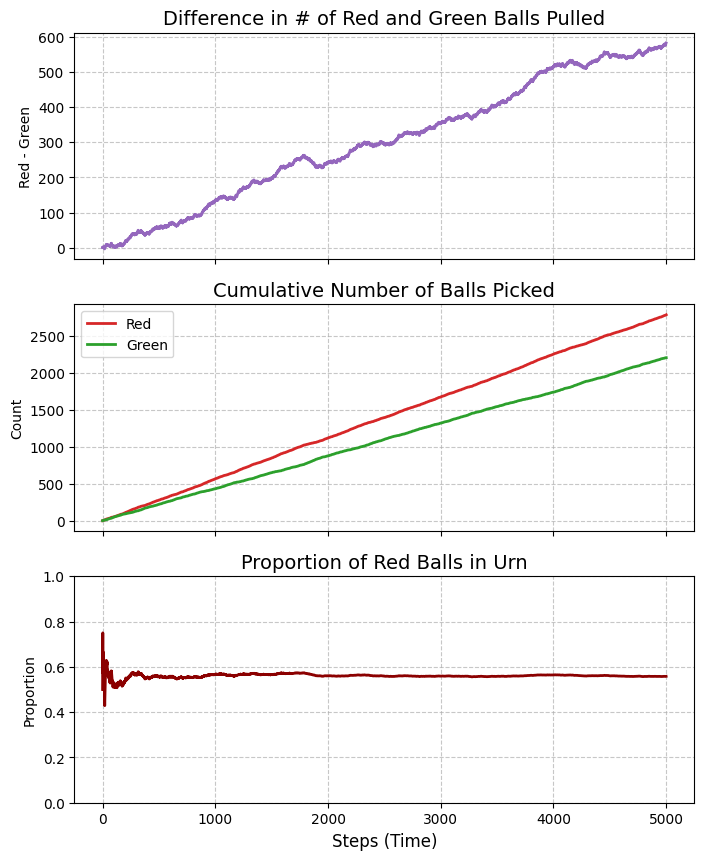

In [190]:
red_final, green_final, colors, red_portions = polyas_urn(1,1,num_steps)

# fig, axes = plt.subplots(rows, cols, ...)
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# 1. Difference in counts
axes[0].plot(np.cumsum(colors), color='tab:purple', lw=2)
axes[0].set_title('Difference in # of Red and Green Balls Pulled', fontsize=14)
axes[0].set_ylabel('Red - Green')
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Cumulative Comparison
axes[1].plot(np.cumsum(red_final), label='Red', color='tab:red', lw=2)
axes[1].plot(np.cumsum(green_final), label='Green', color='tab:green', lw=2)
axes[1].set_title('Cumulative Number of Balls Picked', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)

# 3. Proportion over time
axes[2].plot(red_portions, color='darkred', lw=2)
axes[2].set_title('Proportion of Red Balls in Urn', fontsize=14)
axes[2].set_xlabel('Steps (Time)', fontsize=12)
axes[2].set_ylabel('Proportion')
axes[2].set_ylim(0, 1) # Proportions stay between 0 and 1
axes[2].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent title/label overlap
plt.show()

#### (c) Run Simulations

In [7]:
# run simulation 100 times
def polya_urn_sim(n_steps,n_sims,num_red,num_green):
    mn_list = []
    progression = []
    for i in range(n_sims):
        output = polyas_urn(num_red,num_green,n_steps)

        red_count,green_count,sequence,red_propoertion = output

        mn = np.sum(red_count) / (np.sum(red_count) + np.sum(green_count))
        mn_list.append(mn)

        progression.append(red_propoertion)
    return mn_list,progression

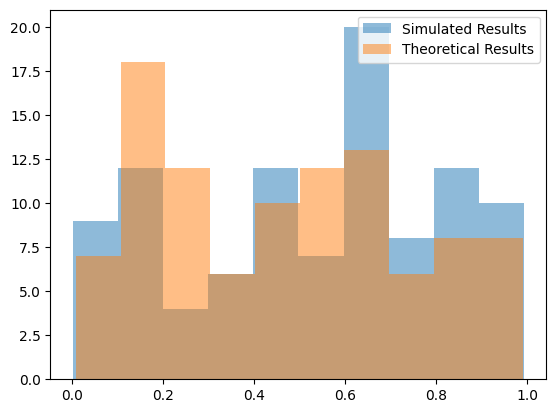

In [8]:
n_simulations = 100
n_steps_sim = 2000
sim_results,paths = polya_urn_sim(n_steps_sim,n_simulations,1,1)
theoretical_returns = np.random.uniform(0,1,n_simulations)

plt.hist(sim_results,alpha=0.5,label="Simulated Results")
plt.hist(theoretical_returns,alpha=0.5,label="Theoretical Results")
plt.legend()
plt.show()

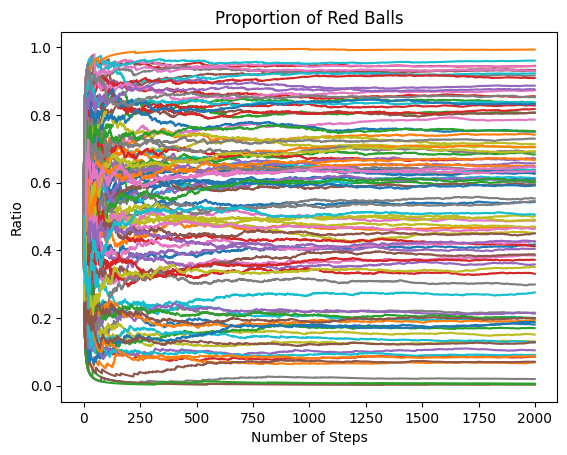

In [9]:
for i in range(n_simulations):
    plt.plot(paths[i])
plt.title('Proportion of Red Balls')
plt.xlabel('Number of Steps')
plt.ylabel('Ratio')
plt.show()

Graph 1: The empirical distribution is very similar to the simulated results.

Graph 2: You can see how the values tend to find their ratios and converge once the number of steps gets larger, this is why initial removal in some simulation is important as it gets to a convergent state rather than the initialization phase which is going to show non converging results

### C2. Simulating simple symmetric random walk and martingale checks.

In Python, simulate the simple symmetric random walk ($Sn$)0≤n≤N with $N$ = 1000.

(a) Generate an array of independent ±1 steps and compute the partial sums Sn.

(b) Compute and plot the running averages

(c) Estimate numerically the conditional expectation $E[S_{n+1} − S_n | F_n]$ by grouping
together paths that share the same Sn. Verify empirically that it is approximately
zero, supporting the martingale property.

#### (a) Generate an array of independent ±1 steps and compute the partial sums Sn.

A random walk can be written as the cumulative sum of random increments.

Let $X_1$, $X_2$, ..., $X_n$ be i.i.d. random variates of binomial with values $+- 1$

We define:

- $S_0$ = 0
- $S_n = X_1 + X_2 + ... + X_n$

$N$ = 1000

In [16]:
def random_walk(probability,n_steps):
    probability_directions = np.random.binomial(1,probability,n_steps) # return 0 or 1 
    directional_values = np.where(probability_directions==0,-1,1) # turn 0 into -1 to represent steps
    return directional_values

In [19]:
# initial random walk
n_steps = 1000
array_random_walk = random_walk(0.5,n_steps)
array_random_walk[0:5] # example of the first 5 outcomes 

array([-1,  1,  1,  1,  1])

The above is the first 5 values of the variates drawn from the random walk of a single replication.

Example of Partial Sum: First 5 outcomes [-1  0  1  2  3]


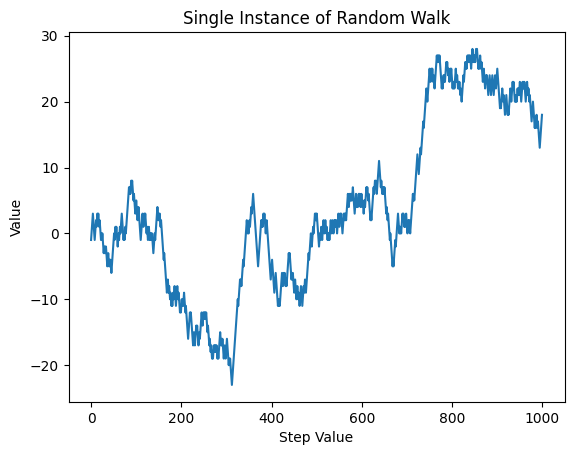

In [20]:
# let's visualize the different steps for just one pull
cumulative_sum = np.cumsum(array_random_walk)
print(f'Example of Partial Sum: First 5 outcomes {cumulative_sum[0:5]}')
plt.plot(cumulative_sum)
plt.title('Single Instance of Random Walk')
plt.xlabel('Step Value')
plt.ylabel('Value')
plt.show()

#### Extension of part a)
Simulate the symmetric random walk as a Monte Carlo Simulation.

In [21]:
def random_walk_simulation(n_steps,probabilities,n_simulations):
    paths_array = []
    for replication in range(n_simulations):
        path = random_walk(probabilities,n_steps)
        paths_array.append(path)
    return paths_array

In [36]:
sim_outcomes = random_walk_simulation(1000,0.50,1000)

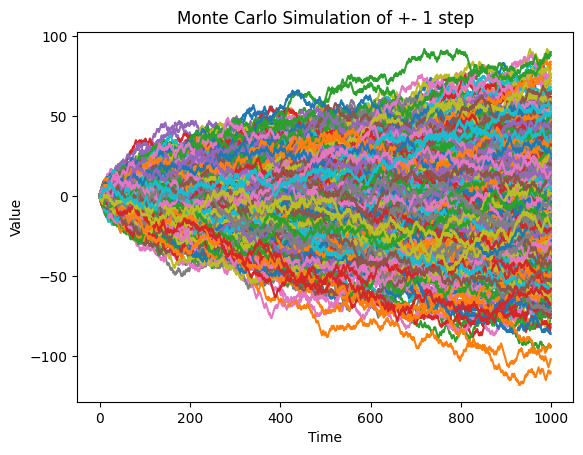

In [37]:
# plot the paths 
cumsum_replications_values = np.cumsum(sim_outcomes,axis=1)

final_values = []
for i in range(n_simulations):
    plt.plot(cumsum_replications_values[i])
    final_values.append(cumsum_replications_values[i][-1])
plt.title('Monte Carlo Simulation of +- 1 step')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

##### Shape of Cone
Mean of S_n grows linearly with n:

$E[S_n] = n * \mu$

Where there is equal probability binomial outcome the mean is 0.

Std of S_n grows quadratically with n:

$Std (S_n) = \sqrt(n)\sigma$

The below histogram confirms the growth of the centered random walk where final outcomes showcase that the values follow a normal distribution where:

- +- 1 $\sigma$ has 0.68 of data
- +- 2 $\sigma$ has 0.95 of data
- +- 3 $\sigma$ has 0.997 of data

Text(0, 0.5, 'Frequency (out of 1000)')

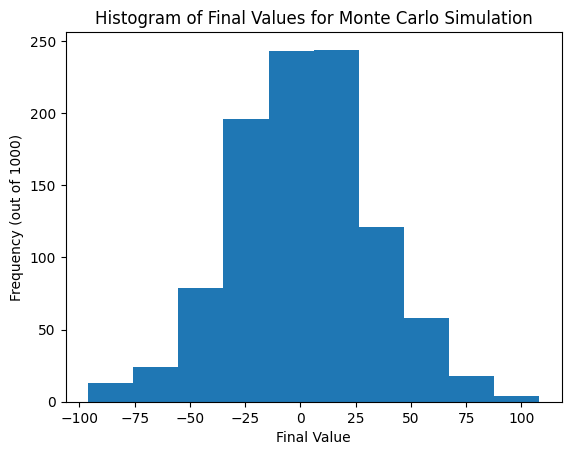

In [27]:
plt.hist(final_values)
plt.title('Histogram of Final Values for Monte Carlo Simulation')
plt.xlabel('Final Value')
plt.ylabel('Frequency (out of 1000)')
plt.show()

In [26]:
sqrt_n = np.sqrt(n_steps)
for i in range(3):
    clt_check = np.abs(final_values) <= (i+1)*sqrt_n
    clt_ratio = clt_check.sum()/len(final_values)
    print(f'Pct of values inside {i+1} std {clt_ratio}')

Pct of values inside 1 std 0.68
Pct of values inside 2 std 0.954
Pct of values inside 3 std 0.996


#### (b) Compute and plot the running averages

$A_n = (1/n) \sum_{i=1}^n S_k$  $n>1$

In [42]:
single_path = sim_outcomes[0]
single_path_sum = np.cumsum(single_path)

Text(0, 0.5, 'Moving Average Value')

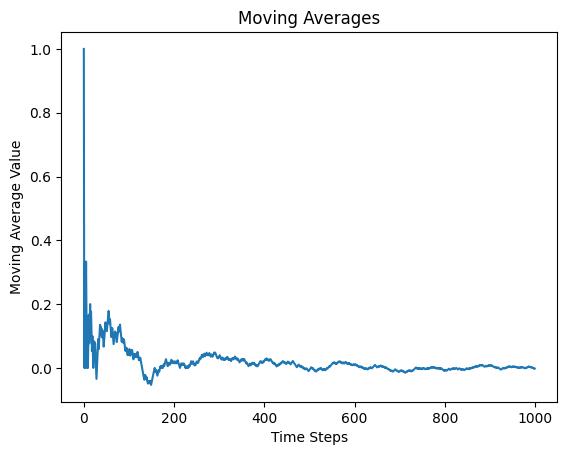

In [43]:
moving_averages = single_path_sum / range(1,n_steps+1)
plt.plot(moving_averages)
plt.title('Moving Averages')
plt.xlabel('Time Steps')
plt.ylabel('Moving Average Value')

Can observe graphically that the moving average moves to 0.

##### Monte Carlo Expansion of Running Averages

Text(0, 0.5, 'Moving Average')

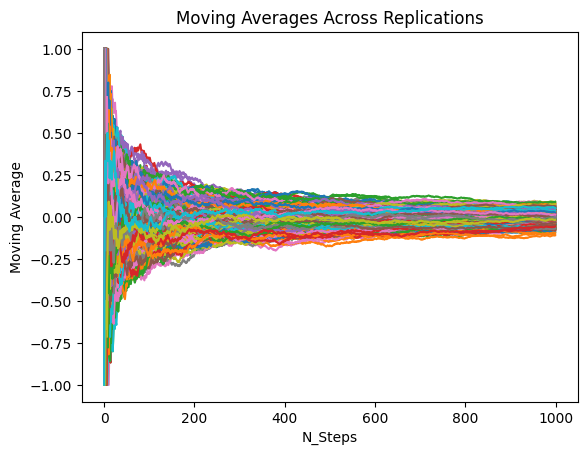

In [50]:
moving_averages_replications_final_values = []
moving_averages_lists = cumsum_replications_values / np.arange(1,n_steps+1)
for replication in range(n_simulations):
    moving_averages_replications_final_values.append(moving_averages_lists[replication][-1])
    plt.plot(moving_averages_lists[replication])
plt.title('Moving Averages Across Replications')
plt.xlabel('N_Steps')
plt.ylabel('Moving Average')

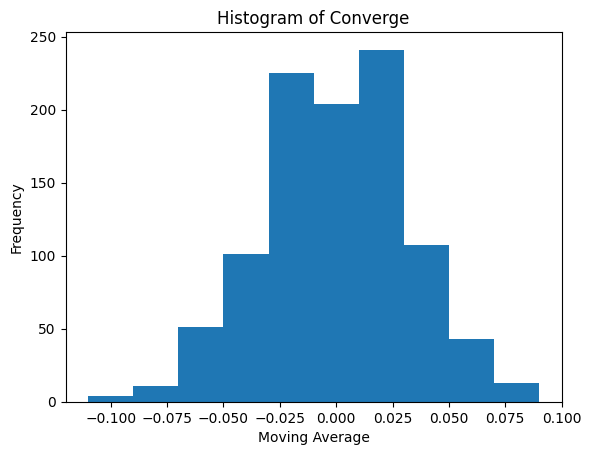

In [51]:
# final values converge towards
plt.hist(moving_averages_replications_final_values)
plt.title('Histogram of Converge')
plt.xlabel('Moving Average')
plt.ylabel('Frequency')
plt.show()

The histogram looks realtively same however with smaller and smaller variances, which is not the same as the random walk where with time the variance increases. This moving average final histogram showcases the upper and lower bound but as n goes to infinity all values will converge to 0.

#### Proving Martingale through Filtration
(c) Estimate numerically the conditional expectation $E[S_{n+1} − Sn | Fn]$ by grouping together paths that share the same Sn. Verify empirically that it is approximately zero, supporting the martingale property.

- Pick an arbitraty time step
- Determine values with same price
- Compare new values to old values grouping by the old price and get average
- Expect average to be statistically close to 0.

In [61]:
import pandas as pd
# first we need to find the paths that have the same path at Sn
# pick a random time step
time_step = 100
values_time_step = cumsum_replications_values[:,time_step]
values_time_step_1 = cumsum_replications_values[:,time_step+1]

n_simulations_values_df = pd.DataFrame({f'n_{time_step}_price':values_time_step,f'n_{time_step+1}_price':values_time_step_1})
n_simulations_values_df

,n_100_price,n_101_price
0,5,6
1,-13,-12
2,27,26
3,-17,-16
4,-7,-8
...,...,...
995,-3,-4
996,1,2
997,-1,0
998,-11,-12


In [65]:
grouped_replications = n_simulations_values_df.groupby('n_100_price') # group by price at time step 100
n_simulations_values_df["direction"] = n_simulations_values_df["n_100_price"] - n_simulations_values_df["n_101_price"] # get the difference from the next time step to the current
avg_direction = grouped_replications["direction"].mean() # get the average dependent on the time at time step 100
avg_direction.head()

n_100_price
-33    1.00
-31   -1.00
-29   -1.00
-27    1.00
-25   -0.25
Name: direction, dtype: float64

Showcases the movement across different grouped values at time step 100

In [63]:
# get the average of these movements as the expectation
expectation_next_price_given_current_price = np.mean(avg_direction)
expectation_next_price_given_current_price

np.float64(-0.08939125084563908)

The average movement grouped by the previous time step is statistically close to 0 and this value will converge to 0. This showcases the conditional probability given the filtration to be true.

### C8: Estimating Hitting Time Moments
Write a python function that simulates $T$ for given $K$ and returns the hitting time. This is an arbitrary $T$.

This is similar to a trading strategy where you may look for a stop loss value and stop betting once it reaches this level.

How do we determine what a good value is?

- Model the movements to get an idea of final values and use $\sigma$
- Use a set value
- Utilize rolling statistics

For this example we will look at the price movements with a random walk and then find our $K$ from heuristic observation.

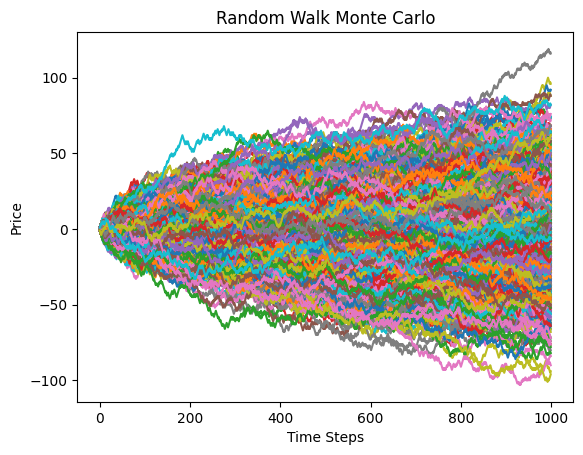

In [126]:
random_walk_simulation_c8 = random_walk_simulation(1000,0.5,1000)

random_walk_paths_c8 = np.cumsum(random_walk_simulation_c8,axis=1)

for i in range(n_simulations):
    plt.plot(random_walk_paths_c8[i])
plt.title('Random Walk Monte Carlo')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()

Choose $K$ = 50 as this should be of an interesting number given the min and max is about +- 100

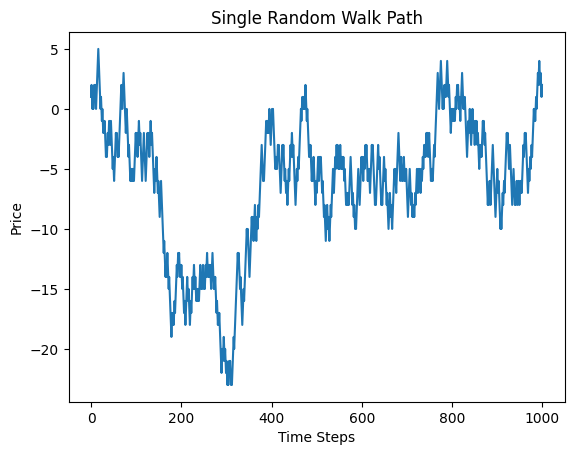

In [191]:
# lets observe a single path
random_walk_single_path_c8 = random_walk_paths_c8[0]

plt.plot(random_walk_single_path_c8)
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.title('Single Random Walk Path')
plt.show()

In [192]:
for i in range(n_steps):
    if np.abs(random_walk_single_path_c8[i]) >= 50:
        print(f"Stopping Condition at {i} as the current price {random_walk_single_path_c8[i]} exceeds upper or lower bound of $50\nBets will now stop")
        break
    elif i+1 == 1000:
        print(f'Stop condition of $50 is not met')

Stop condition of $50 is not met


#### (b) Estimate Stopping Times
Run many simulations for various $K$ (e.g. $K$ = 5, 10, 20) to estimate $E[T]$ and $E[T^2]$

##### $E[T]$ for Different $K$ Values

In [269]:
# create monte carlo function to simulate multiple paths and observe the behavior of stopping time T
# check to see how many times the stopping value of k is hit

def stopping_times_sim(simulation_paths,stopping_value):
    """
    Return:
    Stopping times: gives insight into how long and the frequency of a series hitting the stopping time
    Final Values: gives insight into how the histogram of final returns looks 
    """
    stopping_times = []
    final_values = []
    for path in simulation_paths:
        hit = False

        for i in range(min(n_steps, len(path))):
            if np.abs(path[i]) >= stopping_value:
                stopping_times.append(i)
                final_values.append(path[i])
                hit = True
                break

        if not hit:
            final_values.append(path[-1])

    return final_values, stopping_times

In [270]:
final_values, stopping_times = stopping_times_sim(random_walk_paths_c8,50)

In [271]:
len(stopping_times) / len(random_walk_paths_c8)

0.237

Approximately 24% of paths will halt with this stopping value. 

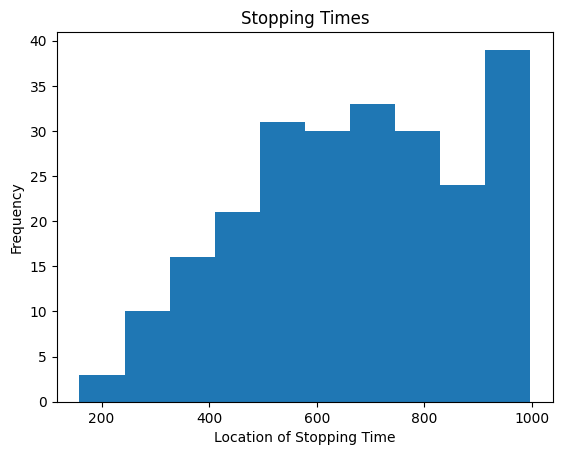

In [272]:
# create a histogram of stopping times
plt.hist(stopping_times)
plt.title('Stopping Times')
plt.xlabel('Location of Stopping Time')
plt.ylabel('Frequency')
plt.show()

The likelihood of a path reaching the stopping value becomes increasingly large as time continue, this makes sense as the cone moves with $\sqrt{n}$.

Next to observe is how does the histogram of returns look for the stopping value vs original.

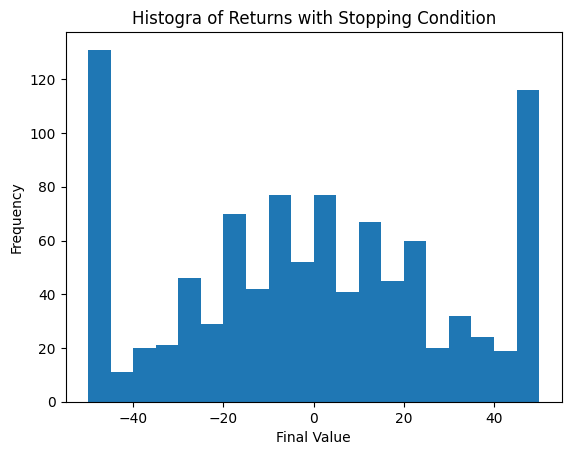

In [275]:
plt.hist(final_values,bins=20)
plt.title('Histogra of Returns with Stopping Condition')
plt.xlabel('Final Value')
plt.ylabel('Frequency')
plt.show()

In [281]:
np.mean(final_values)

np.float64(-0.546)

Observe that the mean is still very close to 0, which helps in the case of $E[M_T] = E[M_0]$

Notice the higher bins at +- 50 due to the stopping time.

You can observe how much lower these middle values are, suggesting that K=50 with stopping is likely to pause the mean reversion behavior where eventually these values would come back to the more centered location.

In [278]:
# get the E[T] across different stopping values
stopping_times_values = np.linspace(10,80,25)

stopping_times_locations_list = []
stopping_times_means = []

for stopping_value in stopping_times_values:
    stopping_times_locations = stopping_times_sim(random_walk_paths_c8,stopping_value)[1]
    stopping_times_locations_list.append(stopping_times_locations)

In [279]:
for different_stopping_times in range(len(stopping_times_locations_list)):
    stopping_times_means.append(np.mean(stopping_times_locations_list[different_stopping_times]))

Text(0, 0.5, 'Average Stopping Time')

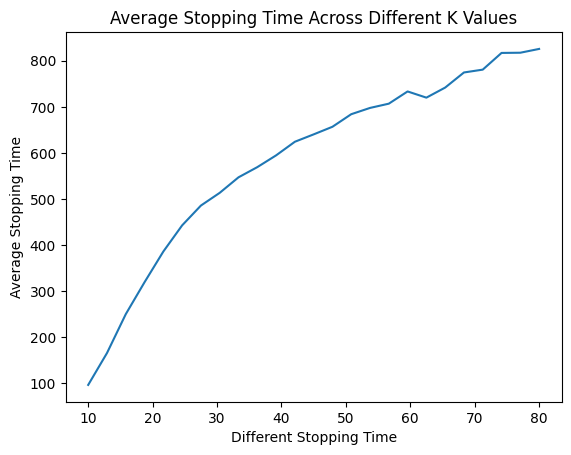

In [280]:
plt.plot(stopping_times_values ,stopping_times_means)
plt.title('Average Stopping Time Across Different K Values')
plt.xlabel('Different Stopping Time')
plt.ylabel('Average Stopping Time')

Relationship between different stopping times $K$ and their $E[T]$

##### Estimate $E[T^2]$ 